In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import cavsim
from cavsim import Measure
from cavsim.connectors import BaseConnector, Connector
from cavsim.channels import ImportChannel, ExportChannel
from cavsim.components import BaseComponent, Component
from cavsim.solvers import BaseSolver, SimpleSolver
from cavsim.fluids import Fluid

In [3]:
from cavsim.pipes.pipe_with_space_interpolation_diesselhorst import Pipe
from cavsim.pipes.two_phase_pipe import Pipe as Pipe2
from cavsim.boundaries.left_boundary_pressure import LeftBoundaryPressure
from cavsim.boundaries.left_boundary_velocity import LeftBoundaryVelocity
from cavsim.boundaries.right_boundary_pressure import RightBoundaryPressure
from cavsim.boundaries.right_boundary_velocity import RightBoundaryVelocity
from cavsim.boundaries.simple_pipe_connector import PipeConnectorSimple
from cavsim.boundaries.zeta_joint import ZetaJoint
from cavsim.boundaries.simple_t_joint import SimpleTJoint
from cavsim.boundaries.simple_right_gasdampener import RightGasBubbleSimple
from cavsim.boundaries.simple_left_gasdampener import LeftGasBubbleSimple
from cavsim.boundaries.frictionless_gasdampener import FrictionlessGasDampener
from cavsim.boundaries.gasdampener import GasDampener
from cavsim.boundaries.pump_suction_valve import PumpSuctionValve
from cavsim.boundaries.pump_discharge_valve import PumpDischargeValve
from cavsim.boundaries.reflectionless_right_boundary_condition import RightBoundaryReflectionFree
from cavsim.boundaries.reflectionless_left_boundary_condition import LeftBoundaryReflectionFree

In [4]:
fluid = Fluid(1000, 1e-3, 2.08e9, 2.3e3,initial_pressure=128000)
discharge_pressure = 20e5

In [5]:
Tank = Pipe(1.5, 0.5, 0.002, 2e11, 1e-4, 4, initial_pressure=1.28e5)
suction = Pipe(0.056, 0.07, 0.002, 2e11, 1e-4, 4, initial_pressure=1.28e5)
suction1 = Pipe(0.056, 1.480, 0.002, 2e11, 1e-4, 4, initial_pressure=1.28e5)
suction2 = Pipe(0.056, 1.210, 0.002, 2e11, 1e-4, 4, initial_pressure=1.28e5)
suction3 = Pipe(0.056, 0.225, 0.102, 2e11, 1e-4, 4, initial_pressure=1.28e5)
suction4 = Pipe(0.056, 0.360, 0.002, 2e11, 1e-4, 4, initial_pressure=1.28e5)
suction5 = Pipe(0.056, 0.590, 0.002, 2e11, 1e-4, 4, initial_pressure=1.28e5)
suction6 = Pipe(0.056, 0.335, 0.012, 2e11, 1e-4, 4, initial_pressure=1.28e5)#, cavitation_factor=0.55, initial_velocity = 0.0)
suction7 = Pipe(0.056, 0.519, 0.002, 2e11, 1e-4, 4, initial_pressure=1.28e5)#, cavitation_factor=0.55, initial_velocity = 0.0)
suction8 = Pipe2(0.056, 0.274, 0.002, 2e11, 1e-4, 4, initial_pressure=1.28e5, cavitation_factor=0.55, initial_velocity = 0.0)
suction10 = Pipe2(0.056, 0.274, 0.002, 2e11, 1e-4, 4, initial_pressure=1.28e5, cavitation_factor=0.55, initial_velocity = 0.0)
suction9 = Pipe2(0.032, 0.15, 0.002, 2e11, 1e-4, 4, initial_pressure=1.28e5, cavitation_factor=0.55, initial_velocity = 0.0)
pump1 = Pipe2(0.03, 0.17, 0.102, 2e11, 1e-4, 4, initial_pressure=discharge_pressure, cavitation_factor=0.55, initial_velocity = 0.0)
pump12 = Pipe2(0.03, 0.0325, 0.102, 2e11, 1e-4, 4, initial_pressure=discharge_pressure, cavitation_factor=0.55, initial_velocity = 0.0)
pump2 = Pipe2(0.07, 0.065, 0.102, 2e11, 1e-4, 8, initial_pressure=discharge_pressure, cavitation_factor=0.55, initial_velocity = 0.0)
pump3 = Pipe2(0.03, 0.17, 0.102, 2e11, 1e-4, 4, initial_pressure=discharge_pressure, cavitation_factor=0.55, initial_velocity = 0.0)
discharge = Pipe(0.025, 3.24, 0.002, 2e11, 1e-4, 4, initial_pressure=discharge_pressure)
discharge15 = Pipe(0.03, 0.325, 0.002, 2e11, 1e-4, 4, initial_pressure=discharge_pressure)
discharge1 = Pipe(0.025, 0.35, 0.002, 2e11, 1e-4, 4, initial_pressure=discharge_pressure)
discharge2 = Pipe(0.025, 27.4, 0.002, 2e11, 1e-4, 4, initial_pressure=discharge_pressure)
discharge3 = Pipe(0.025, 0.5, 0.002, 2e11, 1e-4, 4, initial_pressure=discharge_pressure)
discharge4 = Pipe(0.025, 0.5, 0.002, 2e11, 1e-4, 4, initial_pressure=discharge_pressure)
discharge5 = Pipe(0.025, 0.5, 0.002, 2e11, 1e-4, 4, initial_pressure=discharge_pressure)

In [6]:
lb1 = LeftBoundaryPressure(1.28e5)
lb1.connect(suction1)

In [7]:
def pump(time):
    
    radius = 0.0225
    rratio = 0.0187
    d = 0.07
    #rpm = 72.87
    #rpm = 160.87
    rpm = 183
    #rpm = 197.87
    omega = rpm / 60 * 2* np.pi
    phi0 = np.pi 
    
    result = (radius * omega
                  * (np.sin(omega * time + phi0)
                     - rratio / 2.0 * np.sin(2.0 * (omega * time + phi0))))
    #result = 0.0
    
    return result

In [8]:
rbp = RightBoundaryVelocity(pump, discharge_pressure)

In [9]:
#conn = ZetaJoint(1.0, initial_pressure=1.28e5)
#Tank.connect(conn)
#suction.connect(conn)

In [10]:
#conn1 = ZetaJoint(0.1, initial_pressure=1.28e5)
#suction.connect(conn1)
#suction1.connect(conn1)

In [11]:
#tjoint = SimpleTJoint(1.28e5)
#suction.connect(tjoint.left)
#suction10.connect(tjoint.right)
#suction1.connect(tjoint.right2)

In [12]:
conn2 = ZetaJoint(0.2, initial_pressure=1.28e5)
suction1.connect(conn2)
suction2.connect(conn2)

In [13]:
conn3 = ZetaJoint(1.0, initial_pressure=1.28e5)
suction2.connect(conn3)
suction3.connect(conn3)

In [14]:
conn4 = ZetaJoint(0.4, initial_pressure=1.28e5)
suction3.connect(conn4)
suction4.connect(conn4)

In [15]:
conn5 = ZetaJoint(0.4, initial_pressure=1.28e5)
suction4.connect(conn5)
suction5.connect(conn5)

In [16]:
conn6 = ZetaJoint(0.4, initial_pressure=1.28e5)
suction5.connect(conn6)
suction6.connect(conn6)

In [17]:
conn7 = ZetaJoint(0.4, initial_pressure=1.28e5)
suction6.connect(conn7)
suction7.connect(conn7)

In [18]:
conn8 = ZetaJoint(1.6, initial_pressure=1.28e5)
suction7.connect(conn8)
suction8.connect(conn8)

In [19]:
conn9 = ZetaJoint(0.4, initial_pressure=1.28e5)
suction8.connect(conn9)
suction9.connect(conn9)

In [20]:
#rbs = RightBoundaryReflectionFree(0.0, 1.28e5)
#rbs.connect(suction10)

In [21]:
#gasv = FrictionlessGasDampener(pressure0=1.28e5, volume0=1.0e-8, polytropic_exponent=1.1)
#suction8.connect(gasv)
#suction9.connect(gasv)

In [22]:
angle=np.pi*90/180

In [23]:
suction_valve = PumpSuctionValve(7950.0,
                              3.438,
                              3438.0,
                              0.022,
                              0.068,
                              0.040,
                              0.03644173,
                              angle,
                              7.63e-3,
                              6.480,
                              107.00,
                              74.00,
                              1.40,
                              -2.40,
                              0.50,
                              0.0,
                              0.0,
                              25.0e-3,
                              1.28e5,
                              discharge_pressure)
#suction_valve = PumpSuctionValve(valve_density=7950.0,
#                              spring_force0=3.438,
#                              spring_stiffness=3438.0,
#                              spring_mass=0.022,
#                              valve_mass=0.068,
#                              outer_diameter=0.040,
#                              inner_diameter=0.03644173,
#                              seat_tilt=angle,
#                              flow_constant_1=7.63e-3,
#                              flow_constant_2=6.480,
#                              friction_factor_a=107.00,
#                              friction_factor_b=74.00,
#                              friction_factor_c=1.40,
#                              friction_factor_d=-2.40,
#                              factor_k0=0.50,
#                              factor_k1=0.0,
#                              factor_k2=0.0,
#                              max_displacement=25.0e-3,
#                              left_initial_pressure=1.28e5,
#                              right_initial_pressure=20e5)


suction_valve.connect(suction9)
suction_valve.connect(pump1)

In [24]:
#pump1.connect(lb1)

In [25]:
#gasv = FrictionlessGasDampener(pressure0=12e5, volume0=5.0e-9, polytropic_exponent=1.1)
#pump1.connect(gasv)
#pump12.connect(gasv)

In [26]:
pump = SimpleTJoint(discharge_pressure)
pump1.connect(pump.left)
pump2.connect(pump.right2)
pump3.connect(pump.right)
rbp.connect(pump2)

In [27]:
valve = PumpSuctionValve(7950.0,
                              3.438,
                              3438.0,
                              0.022,
                              0.068,
                              0.040,
                              0.03644173,
                              angle,
                              7.63e-3,
                              6.480,
                              107.00,
                              74.00,
                              1.40,
                              -2.40,
                              0.50,
                              0.0,
                              0.0,
                              25.0e-3,
                              discharge_pressure,
                              discharge_pressure)
valve.connect(pump3)
valve.connect(discharge)

In [28]:
connt = SimpleTJoint(discharge_pressure)
discharge.connect(connt.left)
discharge15.connect(connt.right)
discharge2.connect(connt.right2)

In [29]:
gd_discharge = RightGasBubbleSimple(discharge_pressure, 3e-3, 1.1)
gd_discharge.connect(discharge15)
#gd_discharge = GasDampener(20e5, 3e-3, 1.1, 15)
#gd_discharge.connect(discharge)
#gd_discharge.connect(discharge2)

In [30]:
#connt = ZetaJoint(1,20e5)
#connt.connect(discharge)
#connt.connect(discharge2)

In [31]:
#connt = SimpleTJoint(20e5)
#discharge2.connect(connt.left)
#discharge15.connect(connt.right)
#discharge3.connect(connt.right2)

In [32]:
#gd_discharge1 = RightGasBubbleSimple(20e5, 3e-3, 1.1)
#gd_discharge1.connect(discharge15)

In [33]:
rb = RightBoundaryPressure(discharge_pressure)
rb.connect(discharge2)

In [34]:
plogs1 = []
plogs2 = []
plogs3 = []
vlogs = []
vlogs1 = []
flogs = []
rblogs = []
relogs = []
dislog = []
springlog = []
contact_pressurelog = []
velocity = []
pumplog = []
pump_speed = []
pump_value = []
flow_log = []
lower_pressure_log = []
contact_pressure_log = []
damping_log = []




def logging(time):
    plogs1.append(pump1.field_wide_slice('pressure', 0) + 0.0)
    plogs2.append(pump2.field_wide_slice('pressure', 0) + 0.0)
    plogs3.append(suction9.field_wide_slice('pressure', 0) + 0.0)
    vlogs.append(suction9.field_wide_slice('velocity', 0) + 0.0)
    pumplog.append(pump1.field_wide_slice('velocity', 0) + 0.0)
    dislog.append(valve.field_wide_slice('displacement', 0) + 0.0)
    #pump_speed.append(valve.field_wide_slice('discharge_pressure', 1) +0.0)
    pump_value.append(suction_valve.field_wide_slice('displacement', 1) +0.0)
    springlog.append(valve.field_wide_slice('spring_force', 1) +0.0)
    #contact_pressurelog.append(valve.field_wide_slice('damping_force', 1) +0.0)
    flow_log.append(valve.field_wide_slice('flow_force', 1) +0.0)
    #velocity.append(pump.field_wide_slice('suction_valve_velocity', 1) +0.0)
    #lower_pressure_log.append(pump.field_wide_slice('discharge_lower_pressure_force', 1) +0.0)
    contact_pressure_log.append(valve.field_wide_slice('damping_force', 1) +0.0)
    damping_log.append(valve.field_wide_slice('damping_force', 1) +0.0)

In [35]:
solver = SimpleSolver()
solver.fluid = fluid
solver.seeds = [pump1, pump2 , pump3]#, discharge, discharge15, discharge2]
solver._callback = logging

In [36]:
solver.solve(1e20, 0.75, 3)

 0:00:00 [                              |  0.00%]  1:39:30  Currently at time   0.000 of   0.750

c:\cavsim\cavsim\cavsim\base\solvers\simple_solver.py:46: UserWarning: Smaller timestep required by component! (2.361078632255247e-05 < 1e+20 by <cavsim.pipes.two_phase_pipe.Pipe object at 0x00000222FC2CAE08>)
  warn('Smaller timestep required by component! ({} < {} by {})'.format(component_time, delta_t, component))
c:\cavsim\cavsim\cavsim\base\solvers\simple_solver.py:46: UserWarning: Smaller timestep required by component! (2.2465357947121778e-05 < 1e+20 by <cavsim.pipes.two_phase_pipe.Pipe object at 0x00000222FC2C8D48>)
  warn('Smaller timestep required by component! ({} < {} by {})'.format(component_time, delta_t, component))
c:\cavsim\cavsim\cavsim\base\solvers\simple_solver.py:46: UserWarning: Smaller timestep required by component! (2.361078632255247e-05 < 1e+20 by <cavsim.pipes.two_phase_pipe.Pipe object at 0x00000222FC2DD088>)
  warn('Smaller timestep required by component! ({} < {} by {})'.format(component_time, delta_t, component))
c:\cavsim\cavsim\cavsim\base\solvers\simpl

 2:18:02 [==============================|100.00%]  0:00:00  Currently at time   0.750 of   0.750

In [37]:
pfield1 = np.stack(plogs1)
pfield2 = np.stack(plogs2)
pfield3 = np.stack(plogs3)
disfield = np.stack(dislog)
#velfield = np.stack(velocity)
velocity = np.stack(vlogs)
pressure = np.stack(pumplog)
#pump_velocity = np.stack(pump_speed)
values = np.stack(pump_value)
flow_force = np.stack(flow_log)
#spring_force = np.stack(springlog)
##lower_pressure_force = np.stack(lower_pressure_log)
contact_pressure = np.stack(contact_pressure_log)
#damping_force = np.stack(damping_log)

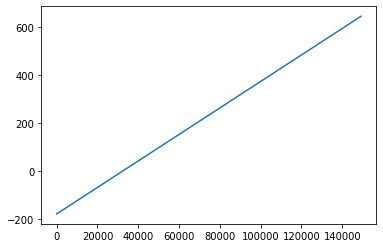

In [38]:
rpm = 197.87
rpm = 72.8
rpm = 160.87
rpm = 183
omega = rpm / 60 * 2* np.pi
phi = np.linspace(-180, omega*0.75*180/np.pi-180, int(pfield1[:,:].shape[0]))
plt.plot(phi)

NameError: name 'ln2' is not defined

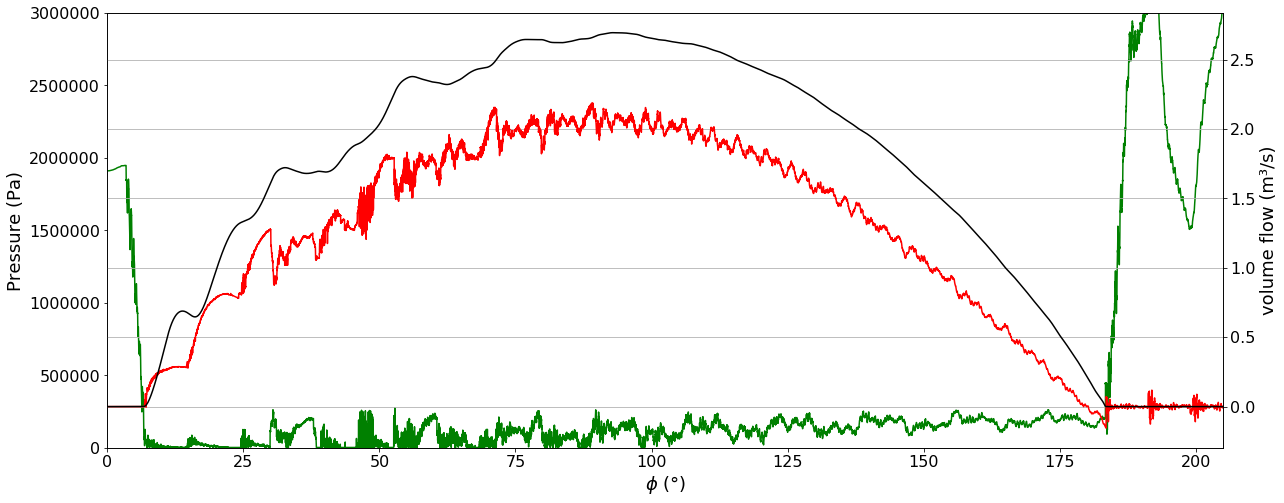

In [39]:
time = np.linspace(0, 1.35, int(pfield1[:,:].shape[0]))
time = phi
#plt.figure(figsize=(16, 10))
fig, ax1 = plt.subplots(figsize=(20, 8))
#plt.subplot(1, 2, 1)
#plt.plot(vfield[:,0])
#plt.plot(1, 2, 2)
val1 = 0
val = -1
#val1 = 0
#val = -1
area = 0.032**2*np.pi/4.0

#upper_force = upperp_field[val1:val, 0] + gfield[val1:val, 0] + springforce[val1:val, 0]
#lower_force = lowp_field[val1:val, 0] + contact_pressure[val1:val, 0]
#result1 = lower_force - upper_force
#result2 = flow_field[val1:val, 0] - gfield[val1:val, 0] - springforce[val1:val, 0] - dampingfield[val1:val, 0]
#upper_flow = gfield[val1:val, 0] + springforce[val1:val, 0] + dampingfield[val1:val, 0]
#lower_flow = flow_field[val1:val, 0]
#ax1.plot(time[val1:val], upper_flow, color='red')
#ax1.plot(time[val1:val], lower_flow, color='blue')


#plt.subplot(1, 2, 2)
#ax1.plot(result1[val1:val])
#ax1.plot(result2[val1:val])
#ax1.plot(time[val1:val], upperp_field[val1:val, 0], color='red')
#ax1.plot(time[val1:val], lowp_field[val1:val, 0], color='green')
#ax1.plot(time[val1:val], dampingfield[val1:val, 0], color='blue')


#ax1.plot(time[val1:val], spring_force[val1:val, 0], color='grey')
#ax1.plot(time[val1:val], lower_force, color='blue')

#plt.plot(time[val1:val], pfield3[val1:val, 1], color='red')
#plt.plot(time[val1:val], pump_velocity[val1:val, 0], color='black')
ln1 = plt.plot(time[val1:val], pfield1[val1:val, 1], color='green', label='Pressure working chamber')
#ln2 = plt.plot(time[val1:val], pfield3[val1:val, 1],color='blue', label='Pressure suction pipe')
#ax1.plot(time[val1:val], velfield[val1:val, 0], color='green')
plt.plot()

#ax1.plot(time[val1:val], deltap[val1:val, 0], color='green')

#plt.xlim(time[val1],time[val])
#plt.ylim(0e5, 22e5)

color = 'tab:red'
ax1.set_xlabel('$\phi$ (°)', color='black', fontsize='18')
ax1.set_ylabel('Pressure (Pa)', color='black', fontsize='18')
#ax1.set_ylim(0.0e5, 23e5)
ax1.set_xlim(-0.0, 205.0)
ax1.set_ylim(0.e5, 30.0e5)
#ax1.grid()
#ax1.plot(time[val1:val], pfield1[val1:val, 1], color='red')
#ax1.plot(time[val1:val], pfield2[val1:val, -2], color='green')
ax1.tick_params(axis='y', labelcolor='black', labelsize='16')
ax1.tick_params(axis='x', labelcolor='black', labelsize='16')


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'

#ax2.plot(time[val1:val], flow_force[val1:val, 0], color='red')
#ax2.plot(time[val1:val], disfield[val1:val, 0]*1000, color='red',label='Discharge valve')  # we already handled the x-label with ax1
ln3 = ax2.plot(time[val1:val], velocity[val1:val, 0], color='red', label='Velocity in suction pipe')
#ax2.plot(time[val1:val], pfield1[val1:val, 1] - pfield1[val1:val, -2])
ln4 = ax2.plot(time[val1:val], values[val1:val, 0]*1e3, color = 'black', label='Displacement suction valve')
ax2.set_ylabel('volume flow (m³/s)', color='black', fontsize='18')
ax2.tick_params(axis='y', labelcolor='black', labelsize='16')
plt.grid()

#ax2.set_ylim(0.0, 12.0)

#plt.subplot(1, 2, 1)
#plt.plot(time[val1:val], disfield[val1:val, 0]*1000, color='black')
#plt.plot(time[val1:val], pump(time[val1:val]))
#plt.plot(time[val1:val], velfield[val1:val, 0], color='blue')
#plt.plot(time[val1:val], pfield2[val1:val, 1], color='red')
#pltplot(time[val1:val], pfield1[val1:val, -2], color='green')
lns = ln1 + ln2 + ln3 + ln4
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='upper right', frameon=False, fontsize='24')
#plt.ylim(-2e3, 2e3)
fig.tight_layout()
plt.show()

In [ ]:
#a = 70/60*(0.07**2)/4*np.pi*0.045

In [ ]:
#a = 70/60(0.07**2)/4*np.pi*0.045
#a/(2*0.025**2/4.0*np.pi)
#print(pump._cases[val1:val])

In [ ]:
zetavalue = (2*(20e5-1.28e5)/((0.2058**2)*1000))

In [ ]:
import nptdms
from nptdms import TdmsFile
savepath = 'C:/Users/Michael Feist/Desktop'
path = "C:/Users/Michael Feist/Desktop"

In [ ]:
def writetdms(tdms, num):
    groups = tdms.groups()
    channels = tdms.group_channels(groups[0])
    channel_names = [channel.channel for channel in channels]
    obj = tdms.object(groups[0], channel_names[num])
    data = np.asarray(obj.data)
    

    return data



def datetime_to_float(timesignal):

    t0 = timesignal[0]
    t1 = timesignal[timesignal.shape[0] - 1]
    sec = (t1-t0).item().total_seconds()
    time = np.linspace(0, sec, timesignal.shape[0])

    return time

In [ ]:
size = 128000
tpAr = np.empty(size)
pAr = np.empty(size)

In [ ]:
ch = (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25)
tdms = TdmsFile(path+'/Messungen_' +str(95)+".tdms")
tpAr = datetime_to_float(writetdms(tdms, ch[10]))
pAr = writetdms(tdms, ch[11])

In [ ]:
new_time = np.linspace(0, (time[-2000]-time[40000]), time[40000:-2000].shape[0])
print(new_time)
plt.figure(figsize=(20, 10))
plt.plot(tpAr[12000:17000]-tpAr[12000], pAr[12000:17000]*1e5, label='Messung')
plt.plot(new_time, pfield1[40000:-2000, 1],color='red', label='Simulation')
plt.xlabel('Zeit in Sekunden', fontsize='14')
plt.ylabel('Druck in Pascal', fontsize='14')
plt.legend(fontsize='14')
plt.ylim(0e5,30e5)
plt.grid()
#plt.savefig('L:/023_CavSim_Plots/Simulation_70Umin.png')


In [ ]:
fig, ax1 = plt.subplots(figsize=(20, 10))
ax1.tick_params(axis='x', labelsize='20')
#ax1.set_title('Vergleich von Messung und Simulation bei 70 U/min', fontsize='30')
color = 'tab:blue'
ln1 = ax1.plot(tpAr[7500:19500]-tpAr[7500], pAr[7500:19500]*1e5, label='Messung')
ln2 = ax1.plot(new_time, pressure[65000:-12000-38000, 0],color='red', label='Simulation')
ax1.set_ylim(0, 22e5)
ax1.set_xlabel('Zeit in $s$', fontsize='24')
ax1.set_ylabel('Druck in $Pa$', color=color, fontsize='24')
ax1.tick_params(axis='y', labelcolor=color, labelsize='20')
#ax1.minorticks_on()
#ax1.grid(which='major', linestyle='--', linewidth='0.5', color='grey')
# Customize the minor grid
# ax1.grid(which='minor', linestyle=':', linewidth='0.5', color='grey')
#ax1.tick_params(which='both',  # Options for both major and minor ticks
#                top='off',  # turn off top ticks
#                left='off',  # turn off left ticks
#                right='off',  # turn off right ticks
#                bottom='off')  # turn off bottom ticks

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:green'
#ax2.set_ylim(0e5, 23e5)
#ln3 = ax2.plot(time, flow,color='red', label='Ventilhub')
ln3 = ax2.plot(new_time, values[65000:-12000-38000, 0]*1000,color='green', label='Simulation Ventilhub')
ax2.set_ylim(0.0, 1.5)
ax2.set_ylabel('Hub in $mm$', color=color, fontsize='24')
ax2.minorticks_on()
#ax1.grid(which='minor', linestyle='--', linewidth='0.5', color='grey')
# Customize the minor grid
# ax1.grid(which='minor', linestyle=':', linewidth='0.5', color='grey')
ax2.tick_params(which='both',  # Options for both major and minor ticks
                top='off',  # turn off top ticks
                left='off',  # turn off left ticks
                right='off',  # turn off right ticks
                bottom='off',  # turn off bottom ticks
                labelsize='20',
                labelcolor=color)
#ax3 = ax2.twinx()
#color = 'tab:green'
#ln3 = ax3.plot(t_hub[613:,], hub[613:,], color='green', label='Hub')
#ax3.set_xlim(0.325,0.725)
#ax2.set_ylim(np.min(flow),0.3)
#ax3.set_xlabel('Zeit (s)')
#ax3.set_ylabel('Hub in $mm$', color=color, fontsize='20')
#ax3.minorticks_on()
#ax1.grid(which='minor', linestyle='--', linewidth='0.5', color='grey')
# Customize the minor grid
# ax1.grid(which='minor', linestyle=':', linewidth='0.5', color='grey')
#ax3.tick_params(which='both',  # Options for both major and minor ticks
#                top='off',  # turn off top ticks
#                left='off',  # turn off left ticks
#                right='off',  # turn off right ticks
#                bottom='off',  # turn off bottom ticks
#                labelsize='16',
#                labelcolor=color)
#ax3.spines["right"].set_position(("axes", 1.05))

lns = ln1 + ln2 + ln3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='lower right', frameon=False, fontsize='24')
plt.savefig('L:/023_CavSim_Plots/Simulation_70Umin.png',dpi=800)
plt.show()

In [ ]:
print(tpAr[7500:19500]-tpAr[7500])

In [ ]:
print((np.max(pAr[7500:19500]*1e5)-np.max(pressure[60500:-1400, 0]))/np.max(pAr[7500:19500]*1e5)*100)